In [4]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel("Ювелирный магазин, данные.xlsx")

In [3]:
df.head()

,date,Variant,cnt(addToCart),sum(addToCartItems)
0,2019-09-01,90,56,110247
1,2019-09-01,10,52,163098
2,2019-09-02,10,59,93317
3,2019-09-02,90,56,26457
4,2019-09-03,90,54,56418


In [39]:
df['cnt(addToCart)'].max()

156

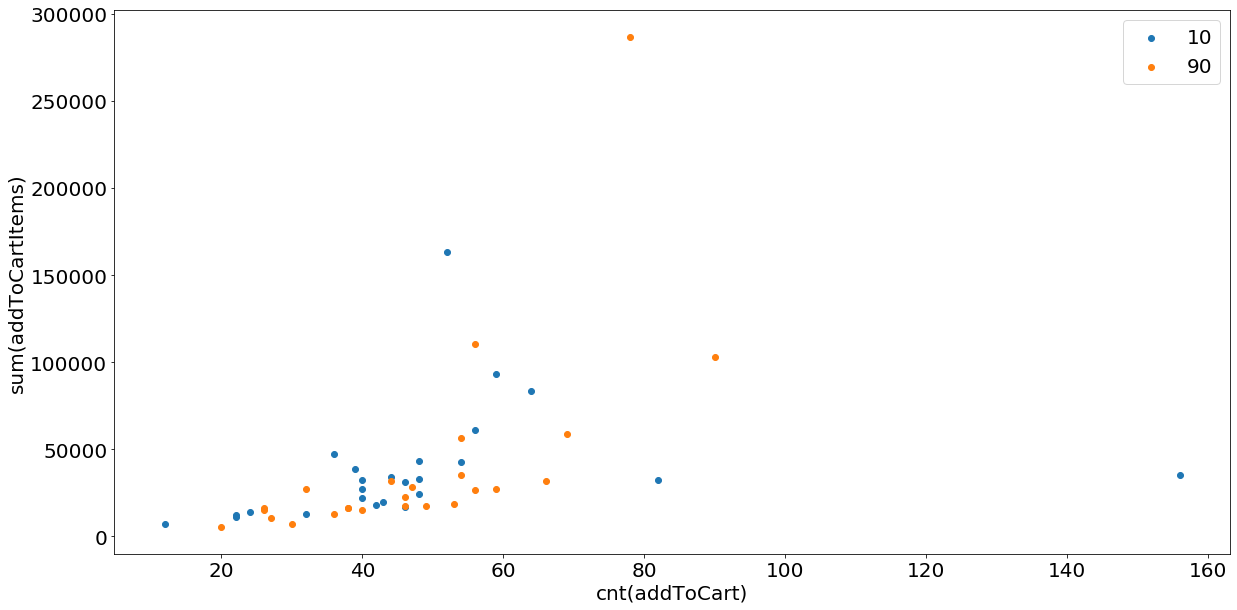

In [11]:
plt.figure(figsize=(20,10))


for name, group in df.groupby('Variant'):
    plt.scatter(group['cnt(addToCart)'], group['sum(addToCartItems)'],   label = name)

plt.ylabel('sum(addToCartItems)', fontsize = 20)
plt.xlabel ('cnt(addToCart)', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.show()  

In [17]:
def bootstrap(arr,n=100,N_TRIAL = 1000,func = np.mean):
    res = []
    n = min(len(arr),n)
    # Инициализируем цикл попыток
    for _ in range(N_TRIAL):
        # Делаем подвыборку размера n
        if len(arr.shape)>1:
            ind = np.random.choice(np.arange(arr.shape[0]), size = (n,))
            subsample = arr.iloc[ind]
        else:
            subsample = np.random.choice(arr, size = (n,))
        # рассчитываем статистику
        stat = func(subsample)
        res.append(stat)
    return res # shape (N_TRIAL,)

In [64]:
samples_a = bootstrap(df.query("Variant== 10")['cnt(addToCart)'],N_TRIAL = 1000)
samples_b = bootstrap(df.query("Variant== 90")['cnt(addToCart)'],N_TRIAL = 1000)

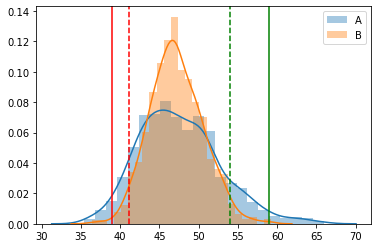

In [66]:
import seaborn as sns
ax = sns.distplot(samples_a,label = 'A')
sns.distplot(samples_b,ax = ax,label = 'B')
ax.legend(['A','B'])
ax.axvline(np.percentile(samples_a,2.5),linestyle = '-',color='r')
ax.axvline(np.percentile(samples_a,97.5),linestyle = '-',color='g')

ax.axvline(np.percentile(samples_b,2.5),linestyle = '--',color='r')
ax.axvline(np.percentile(samples_b,97.5),linestyle = '--',color='g')

In [67]:
buf = []
for i in range(1000):
    a_sample =  df.query("Variant== 10")['cnt(addToCart)'].sample(20)
    b_sample =  df.query("Variant== 90")['cnt(addToCart)'].sample(20)
    buf.append(np.mean(b_sample)-np.mean(a_sample))

min = -5.8024999999999975 max = 6.402499999999996


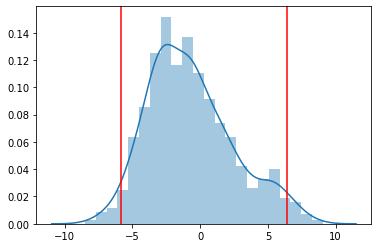

In [68]:
ax_buf = sns.distplot(buf)
ax_buf.axvline(np.percentile(buf,2.5),linestyle = '-',color='r')
ax_buf.axvline(np.percentile(buf,97.5),linestyle = '-',color='r')
print('min =',np.percentile(buf,2.5),'max =',np.percentile(buf,97.5))

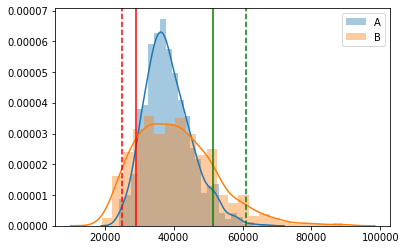

In [69]:
samples_a_resp = bootstrap(df.query("Variant== 10")['sum(addToCartItems)'],N_TRIAL = 1000)
samples_b_resp = bootstrap(df.query("Variant== 90")['sum(addToCartItems)'],N_TRIAL = 1000)
ax = sns.distplot(samples_a_resp,label = 'B')
sns.distplot(samples_b_resp,ax = ax,label = 'A')
ax.legend(['A','B'])
ax.axvline(np.percentile(samples_a_resp,5),linestyle = '-',color='r')
ax.axvline(np.percentile(samples_a_resp,95),linestyle = '-',color='g')

ax.axvline(np.percentile(samples_b_resp,5),linestyle = '--',color='r')
ax.axvline(np.percentile(samples_b_resp,95),linestyle = '--',color='g')

In [70]:
buf_1=[]
for i in range(1000):
    a_sample =  df.query("Variant== 10")['sum(addToCartItems)'].sample(20)
    b_sample =  df.query("Variant== 90")['sum(addToCartItems)'].sample(20)
    buf_1.append(np.mean(b_sample)-np.mean(a_sample))

min = -11994.7225 max = 13366.817500000003


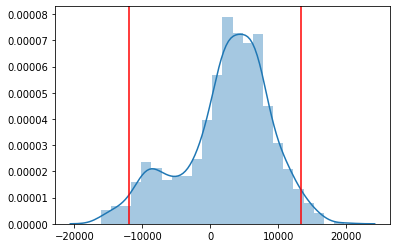

In [71]:
ax_buf = sns.distplot(buf_1)
ax_buf.axvline(np.percentile(buf_1,2.5),linestyle = '-',color='r')
ax_buf.axvline(np.percentile(buf_1,97.5),linestyle = '-',color='r')
print('min =',np.percentile(buf_1,2.5),'max =',np.percentile(buf_1,97.5))

Доверительные варианты пересекаются, распределение разницы средних включает ноль, можем сделать вывод, что разницы между двумя вариантами нет.